In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [116]:
df=pd.read_csv("train_256286.csv")

In [117]:
#Clean up column names (remove spaces/symbols, make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-z0-9_]', '_', regex=True)
print("Columns:", df.columns.tolist())

Columns: ['timestamp', 'pv_mod1', 'pv_mod2', 'pv_mod3', 'demand', 'pv', 'price', 'temperature', 'pressure__hpa_', 'cloud_cover____', 'cloud_cover_low____', 'cloud_cover_mid____', 'cloud_cover_high____', 'wind_speed_10m__km_h_', 'shortwave_radiation__w_m__', 'direct_radiation__w_m__', 'diffuse_radiation__w_m__', 'direct_normal_irradiance__w_m__', 'daymax']


In [118]:
#create a daily column for grouping
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [119]:
#Find the PV generation of each day
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['PV_generation_W'] = (
    df['shortwave_radiation__w_m__'] +
    df['direct_radiation__w_m__'] +
    df['diffuse_radiation__w_m__'] +
    df['direct_normal_irradiance__w_m__']
)

#Convert W/m2 to KW/m2
df['PV_generation'] = df['PV_generation_W'] / 1000

#Extract date for daily aggregation
df['date'] = df['timestamp'].dt.date


#Aggregate to daily data
# Find your demand and price columns in the printed list above — adjust if needed
df_daily = df.groupby('date').agg({
    'PV_generation': 'sum',
    'demand': 'sum',
    'price': 'mean'
}).reset_index()


In [120]:
#Filter July 1–15
mask = (df_daily['date'] >= pd.to_datetime('2013-07-01').date()) & \
        (df_daily['date'] <= pd.to_datetime('2013-07-15').date())
df_july = df_daily.loc[mask]

In [121]:
print(df_daily['date'].min(), "→", df_daily['date'].max())
print(df_july)

2013-07-01 → 2014-06-30
          date  PV_generation  demand     price
0   2013-07-01         6.4862   12.83  0.028639
1   2013-07-02         2.6624   10.55  0.041178
2   2013-07-03         1.4072   13.08  0.041636
3   2013-07-04         3.3054   12.52  0.021180
4   2013-07-05         5.7086   11.73  0.025830
5   2013-07-06         1.8879   11.36  0.028954
6   2013-07-07         5.6168    9.15  0.027545
7   2013-07-08         3.4603   11.71  0.033172
8   2013-07-09         4.7417    6.29  0.038079
9   2013-07-10         2.3801    6.26  0.030990
10  2013-07-11         1.9672    6.04  0.026897
11  2013-07-12         2.1919   11.37  0.024668
12  2013-07-13        10.8020   10.17  0.034214
13  2013-07-14         6.2339   13.29  0.037510
14  2013-07-15         3.3501    9.01  0.035497


In [122]:
print(df_daily.head())

         date  PV_generation  demand     price
0  2013-07-01         6.4862   12.83  0.028639
1  2013-07-02         2.6624   10.55  0.041178
2  2013-07-03         1.4072   13.08  0.041636
3  2013-07-04         3.3054   12.52  0.021180
4  2013-07-05         5.7086   11.73  0.025830


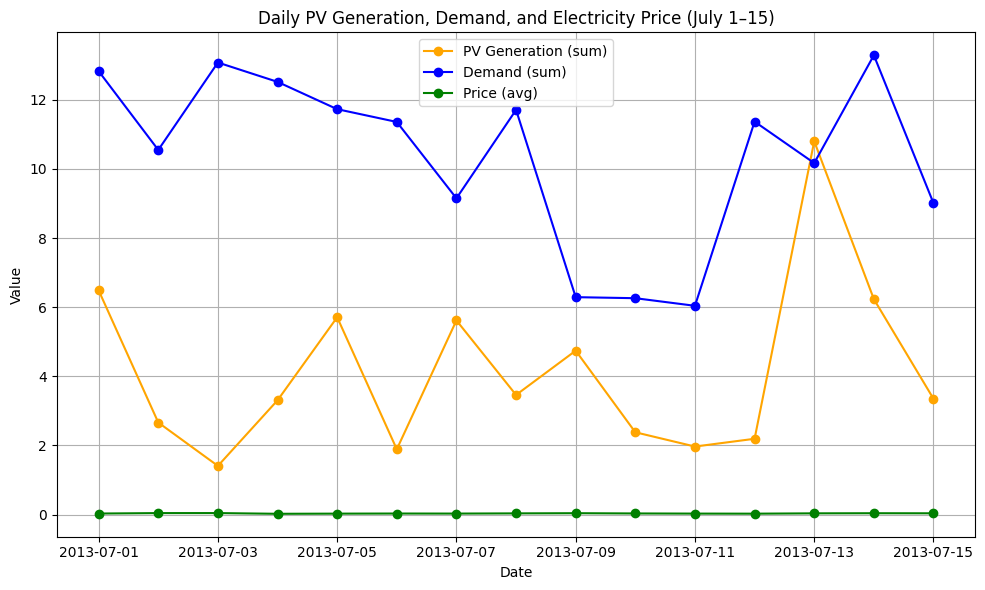

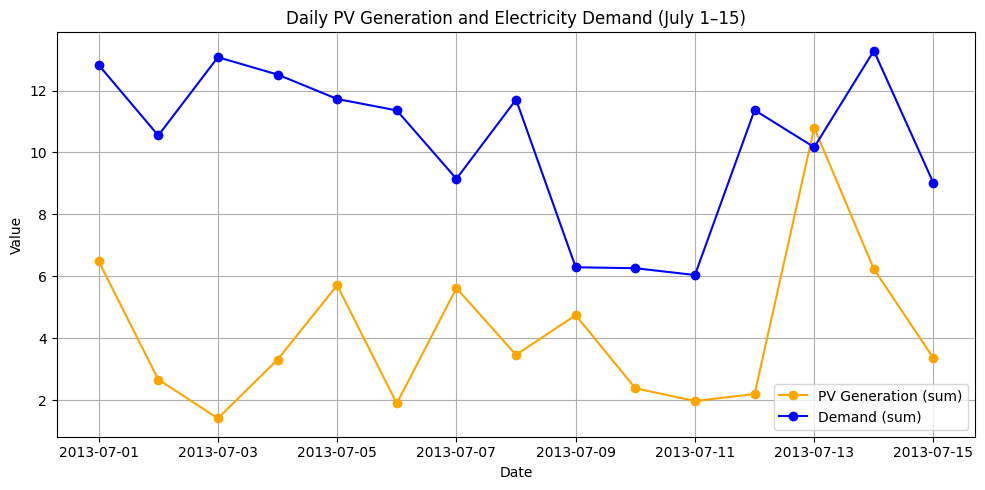

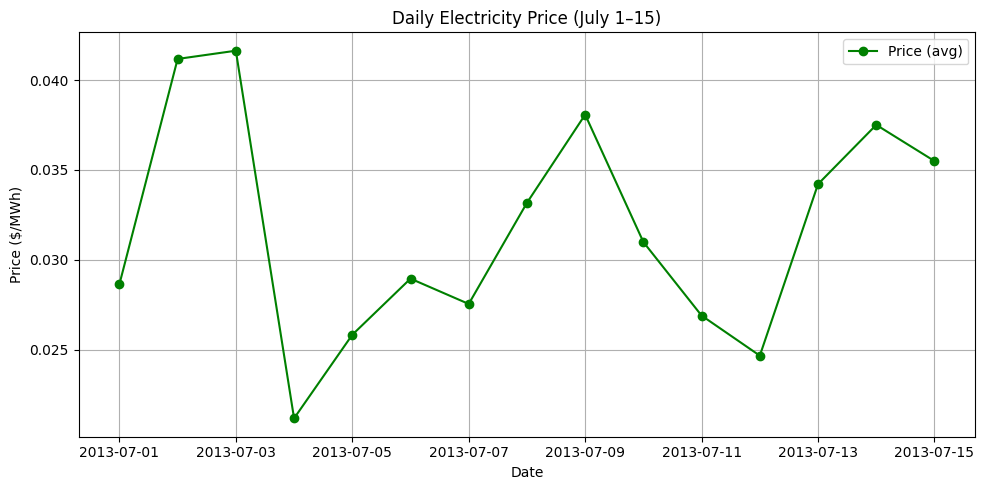

In [123]:
#Plot daily results

plt.figure(figsize=(10,6))
plt.plot(df_july['date'], df_july['PV_generation'], marker='o', color='orange', label='PV Generation (sum)')
plt.plot(df_july['date'], df_july['demand'], marker='o', color='blue', label='Demand (sum)')
plt.plot(df_july['date'], df_july['price'], marker='o', color='green', label='Price (avg)')

plt.title('Daily PV Generation, Demand, and Electricity Price (July 1–15)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot 1: PV Generation and Demand ---
plt.figure(figsize=(10, 5))
plt.plot(df_july['date'], df_july['PV_generation'], marker='o', color='orange', label='PV Generation (sum)')
plt.plot(df_july['date'], df_july['demand'], marker='o', color='blue', label='Demand (sum)')
plt.title('Daily PV Generation and Electricity Demand (July 1–15)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot 2: Electricity Price ---
plt.figure(figsize=(10, 5))
plt.plot(df_july['date'], df_july['price'], marker='o', color='green', label='Price (avg)')
plt.title('Daily Electricity Price (July 1–15)')
plt.xlabel('Date')
plt.ylabel('Price ($/MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
